In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

df= pd.read_csv('.//bank-additional//bank-additional-full.csv', sep=';')
df.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

In [98]:
df.shape

(41188, 21)

In [99]:
#split training and test set and export to csv
train, test = train_test_split(df, test_size = 0.2)
test.to_csv('test.csv', sep=',')
train.to_csv('train.csv',sep=',')
len(test), len(train)

(8238, 32950)

In [100]:
df = train
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28652,54,entrepreneur,divorced,unknown,no,no,yes,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,no
3325,53,retired,divorced,high.school,no,no,yes,telephone,may,thu,...,5,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
1292,37,unemployed,married,professional.course,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
21159,41,self-employed,married,university.degree,no,yes,no,cellular,aug,mon,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
2483,56,admin.,married,high.school,no,no,no,telephone,may,tue,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


In [101]:
df.info()
#from _future_ import division

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 28652 to 39976
Data columns (total 21 columns):
age               32950 non-null int64
job               32950 non-null object
marital           32950 non-null object
education         32950 non-null object
default           32950 non-null object
housing           32950 non-null object
loan              32950 non-null object
contact           32950 non-null object
month             32950 non-null object
day_of_week       32950 non-null object
duration          32950 non-null int64
campaign          32950 non-null int64
pdays             32950 non-null int64
previous          32950 non-null int64
poutcome          32950 non-null object
emp.var.rate      32950 non-null float64
cons.price.idx    32950 non-null float64
cons.conf.idx     32950 non-null float64
euribor3m         32950 non-null float64
nr.employed       32950 non-null float64
y                 32950 non-null object
dtypes: float64(5), int64(5), object(11)
memory

In [102]:
cat_cols = df.select_dtypes(exclude=['int64','float64'])
for col in cat_cols:
    count_unk = len(df[df[col] == 'unknown'])
    if count_unk > 0:
        print(col, count_unk, len(df), round((float(count_unk)/len(df)) * 100,1))
        print(df[col].unique())

('job', 263, 32950, 0.8)
['entrepreneur' 'retired' 'unemployed' 'self-employed' 'admin.'
 'blue-collar' 'services' 'technician' 'housemaid' 'management' 'unknown'
 'student']
('marital', 63, 32950, 0.2)
['divorced' 'married' 'single' 'unknown']
('education', 1395, 32950, 4.2)
['unknown' 'high.school' 'professional.course' 'university.degree'
 'basic.9y' 'basic.6y' 'basic.4y' 'illiterate']
('default', 6863, 32950, 20.8)
['no' 'unknown' 'yes']
('housing', 794, 32950, 2.4)
['no' 'yes' 'unknown']
('loan', 794, 32950, 2.4)
['yes' 'no' 'unknown']


In [103]:
# lets drop all records with 'unknown' and see if there are enough records
df1 = df.copy()
for m in cat_cols:
    c = df1[df[m].str.contains('unknown')]
    print(m,len(c), len(df1))
    df1 = df1[~df[m].str.contains('unknown')]
    print('after: ', len(df1))
len(df), len(df1), round(100*float(len(df1))/len(df),1),'%'

('job', 263, 32950)
('after: ', 32687)
('marital', 55, 32687)
('after: ', 32632)
('education', 1291, 32632)
('after: ', 31341)


C:\ProgramData\Anaconda3\envs\python2\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\envs\python2\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


('default', 6360, 31341)
('after: ', 24981)
('housing', 582, 24981)
('after: ', 24399)
('loan', 0, 24399)
('after: ', 24399)
('contact', 0, 24399)
('after: ', 24399)
('month', 0, 24399)
('after: ', 24399)
('day_of_week', 0, 24399)
('after: ', 24399)
('poutcome', 0, 24399)
('after: ', 24399)
('y', 0, 24399)
('after: ', 24399)


(32950, 24399, 74.0, '%')

In [104]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,39.985584,257.966737,2.576206,962.325099,0.172625,0.083936,93.574742,-40.481208,3.624299,5167.144537
std,10.414681,258.551664,2.806431,187.279099,0.495392,1.571362,0.578289,4.633245,1.733792,72.222882
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4199.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Index([u'age', u'duration', u'campaign', u'pdays', u'previous',
       u'emp.var.rate', u'cons.price.idx', u'cons.conf.idx', u'euribor3m',
       u'nr.employed'],
      dtype='object')


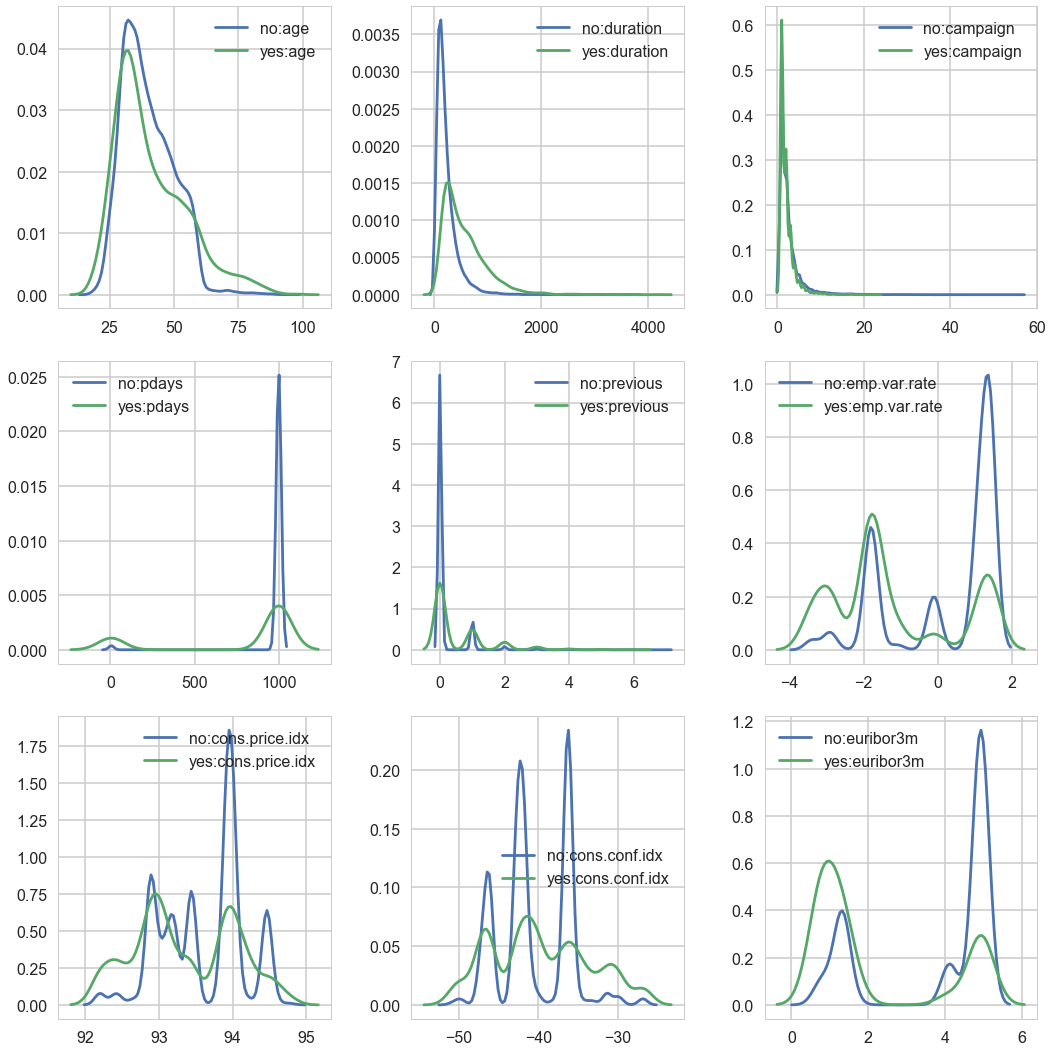

In [105]:
int_cols = df.select_dtypes(include=['int64','float64']).columns
print(int_cols)
dfgb = df.groupby(['y'])
nrows = int(round(float(len(int_cols))/3, 0))
ncols = 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows*5, ncols*5), tight_layout=True)
for ax, p in zip(axes.ravel(), int_cols):
    for k, v in dfgb[p]:
        sns.kdeplot(v, ax=ax, label=str(k)+":"+v.name)
fig.savefig("Numeric_kde.png")
#print(fig)

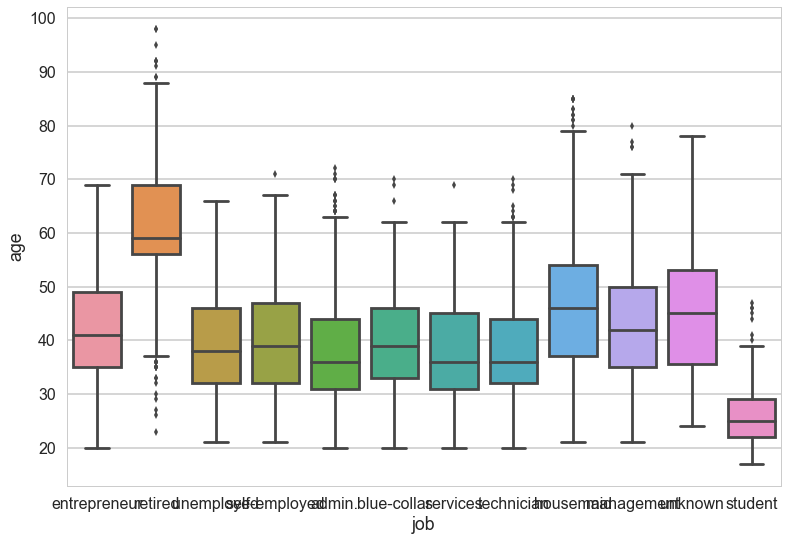

In [106]:
ax = sns.boxplot(x="job", y="age", data=df)

In [107]:
del df['duration']

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5]),
 <a list of 9 Text yticklabel objects>)

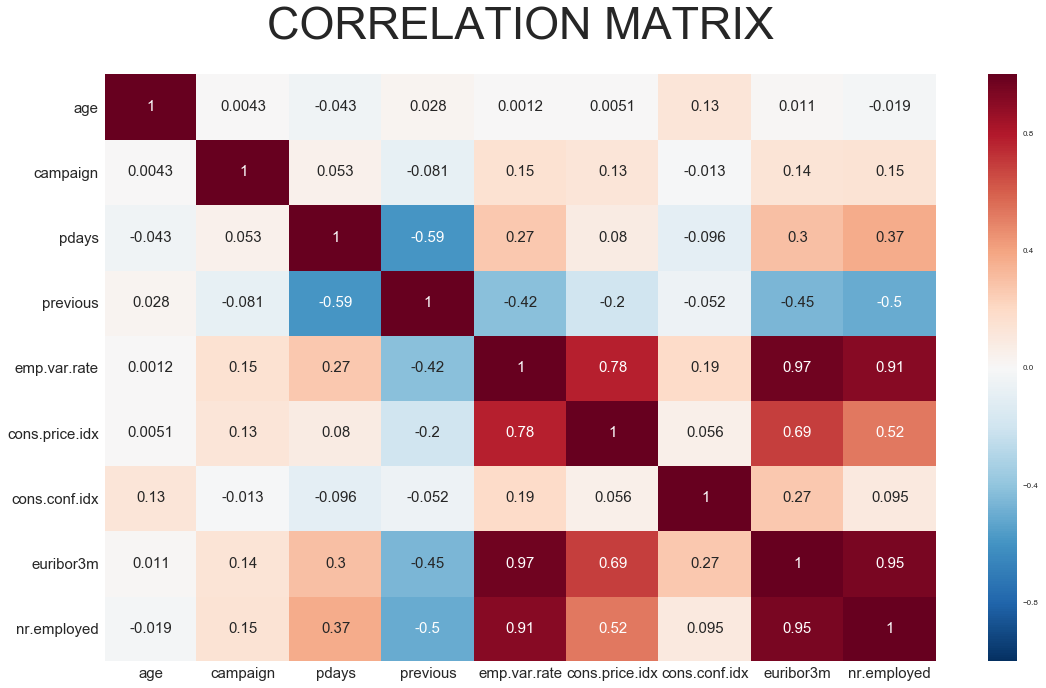

In [108]:
int_cols = df.select_dtypes(include=['int64','float64']).columns
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":20,"font.scale":1.5})   
plt.figure(figsize=(15, 10))
corr = df[int_cols].corr()
b = sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
b.figure.savefig("allCorr.png")
b.axes.set_title("CORRELATION MATRIX",fontsize=45,y=1.05)
#b.set_xlabel("X Label",fontsize=20,labelpad=10)
#b.set_ylabel("Y Label",fontsize=20,labelpad=10)
b.tick_params(labelsize=15)
plt.tight_layout(pad=0.7, w_pad=0.5, h_pad=1.0)
plt.yticks(rotation=1)
plt.yticks(rotation=0)
#sns.plt.show()

In [109]:
del df['nr.employed']
del df['cons.price.idx']
del df['emp.var.rate']
df.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'campaign', u'pdays',
       u'previous', u'poutcome', u'cons.conf.idx', u'euribor3m', u'y'],
      dtype='object')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text yticklabel objects>)

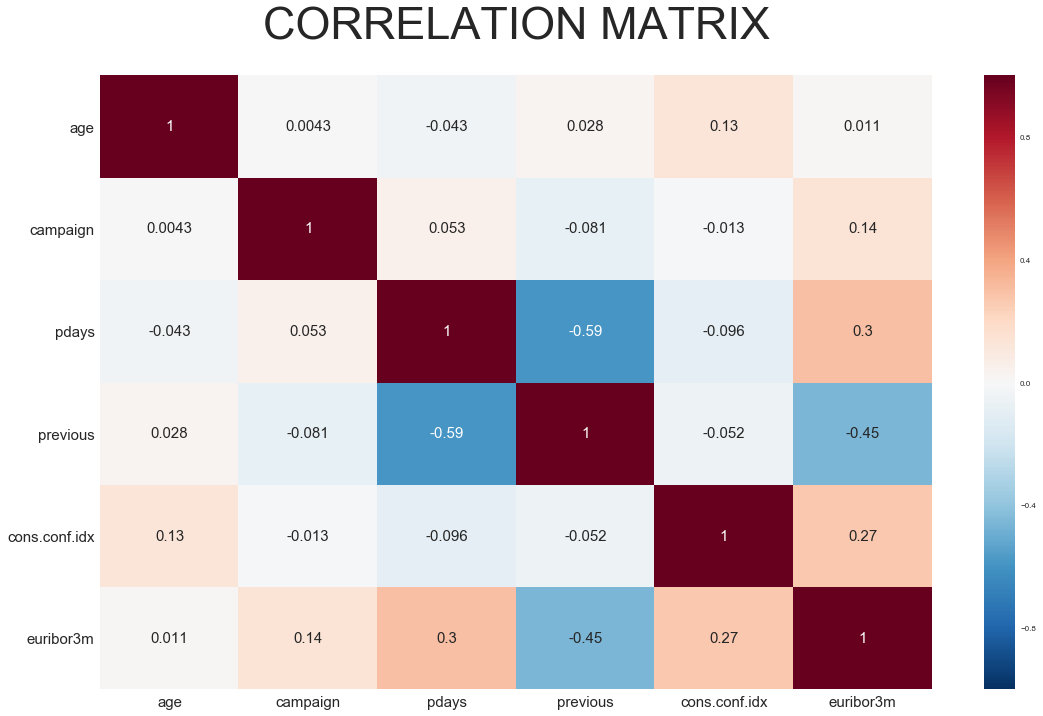

In [110]:
int_cols = df.select_dtypes(include=['int64','float64']).columns
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":20,"font.scale":1.5})   
plt.figure(figsize=(15, 10))
corr = df[int_cols].corr()
b = sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
b.figure.savefig("allCorr.png")
b.axes.set_title("CORRELATION MATRIX",fontsize=45,y=1.05)
#b.set_xlabel("X Label",fontsize=20,labelpad=10)
#b.set_ylabel("Y Label",fontsize=20,labelpad=10)
b.tick_params(labelsize=15)
plt.tight_layout(pad=0.7, w_pad=0.5, h_pad=1.0)
plt.yticks(rotation=1)
plt.yticks(rotation=0)
#sns.plt.show()

In [113]:
100*float(len(df[df['pdays'] == 999]))/len(df) 

96.30652503793627

In [117]:
df['pdays_class'] = pd.cut(np.array(df['pdays']), bins=[0,5,10,20,30,40,999,1000],\
                           labels=["0-5","5-10","10-20","20-30","30-40","Not Contacted","Other"])
df[['pdays_class','pdays']].head(), len(df[df['pdays_class'] == "Not Contacted"]), \
df.head(2)

(         pdays_class  pdays
 28652  Not Contacted    999
 3325   Not Contacted    999
 1292   Not Contacted    999
 21159  Not Contacted    999
 2483   Not Contacted    999,
 31733,
        age           job   marital    education default housing loan  \
 28652   54  entrepreneur  divorced      unknown      no      no  yes   
 3325    53       retired  divorced  high.school      no      no  yes   
 
          contact month day_of_week  campaign  pdays  previous     poutcome  \
 28652   cellular   apr         thu         2    999         1      failure   
 3325   telephone   may         thu         5    999         0  nonexistent   
 
        cons.conf.idx  euribor3m   y    pdays_class  
 28652          -47.1       1.41  no  Not Contacted  
 3325           -36.4       4.86  no  Not Contacted  )

In [115]:
print(len(df))
pd.crosstab(df.pdays_class, df.y, margins=True)

32950


y,no,yes,All
pdays_class,,,
0-5,203,349,552
5-10,164,327,491
10-20,67,86,153
20-30,1,7,8
30-40,0,0,0
Not Contacted,28808,2925,31733
Other,0,0,0
All,29243,3694,32937


In [118]:
del df['pdays']

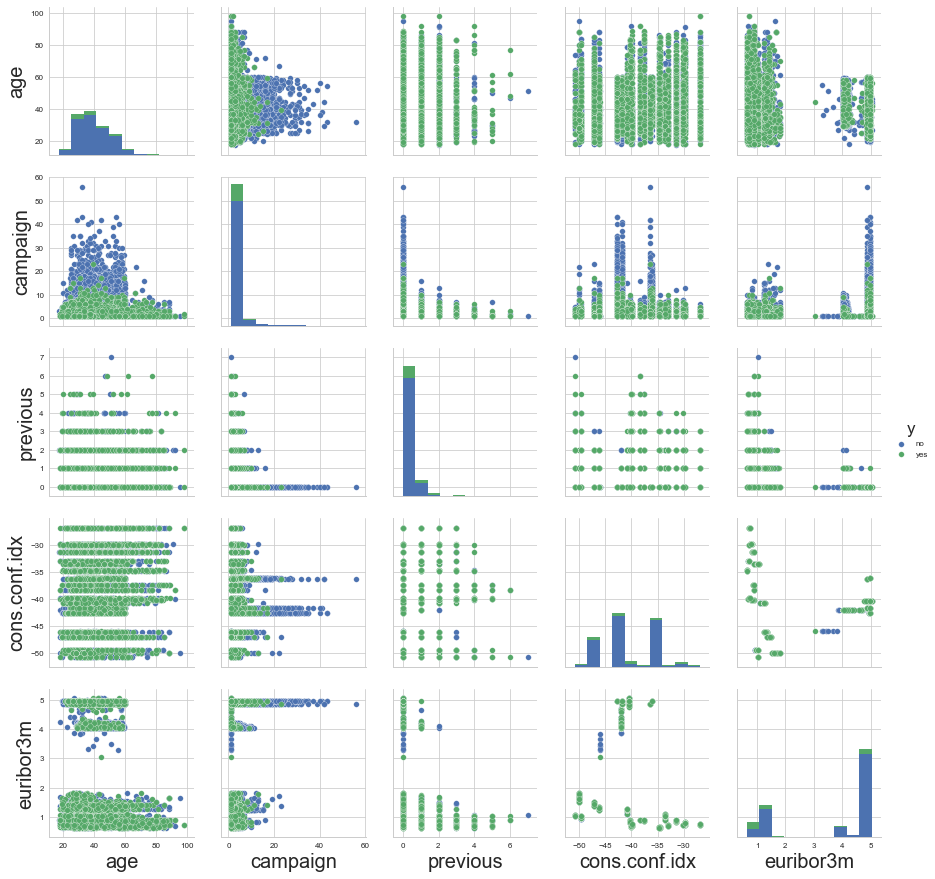

In [120]:
z = sns.pairplot(df,hue='y')

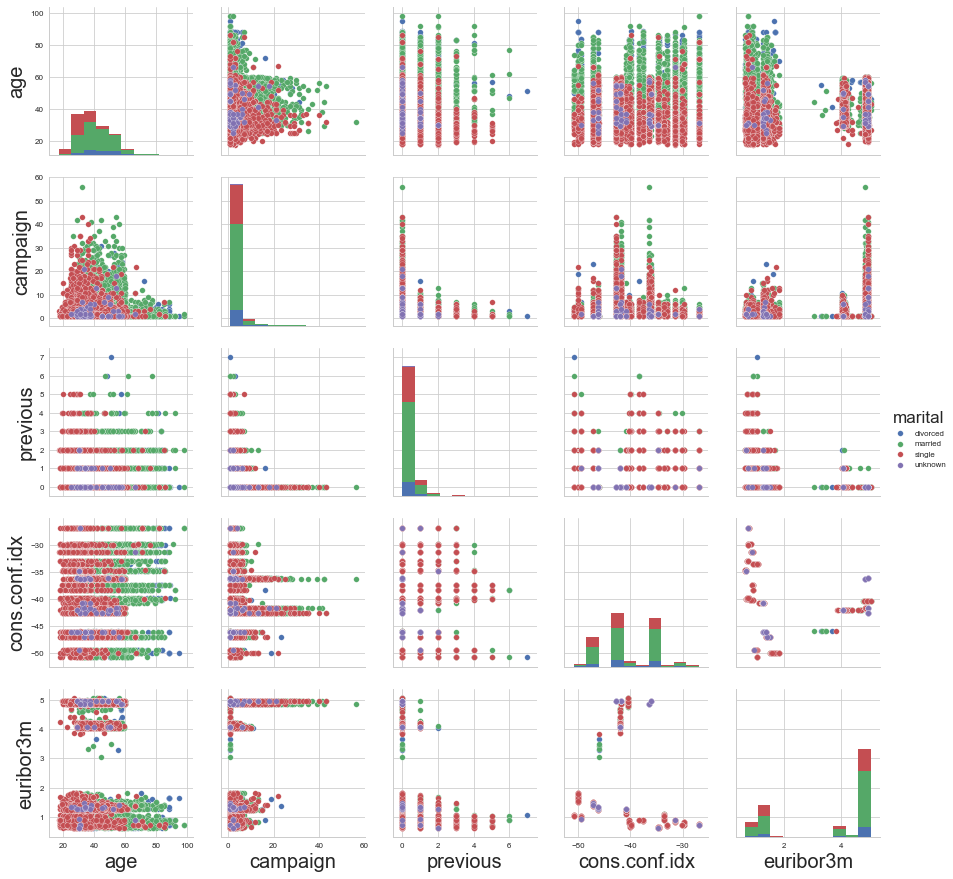

In [122]:
z = sns.pairplot(df,hue='marital')

In [123]:
df.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'campaign', u'previous',
       u'poutcome', u'cons.conf.idx', u'euribor3m', u'y', u'pdays_class'],
      dtype='object')